# Inference dengan gambar satuan

In [13]:
from IPython.display import Image, display
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import requests
import tensorflow as tf

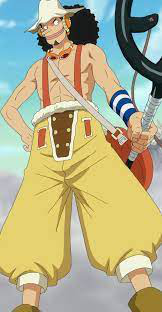

Predicting image: usopp.png
The predicted class is: Usopp

Probabilities for all classes:
Ace: 0.0015
Akainu: 0.0296
Brook: 0.0019
Chopper: 0.3434
Crocodile: 0.0002
Franky: 0.0375
Jinbei: 0.0065
Kurohige: 0.0680
Law: 0.0000
Luffy: 0.1366
Mihawk: 0.0000
Nami: 0.0018
Rayleigh: 0.0232
Robin: 0.0006
Sanji: 0.1398
Shanks: 0.0282
Usopp: 0.9999
Zoro: 0.0273


In [14]:
# List of all the classes
class_names = ['Ace', 'Akainu', 'Brook', 'Chopper', 'Crocodile', 'Franky', 'Jinbei', 'Kurohige', 'Law', 'Luffy', 'Mihawk', 'Nami', 'Rayleigh', 'Robin', 'Sanji', 'Shanks', 'Usopp', 'Zoro']

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = tf.keras.utils.load_img(img_path, target_size=target_size)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    return img_array

# Get random image from the Images folder
img_path = random.choice(os.listdir("Images"))

# Show the image on notebook
display(Image(f"Images/{img_path}"))
print(f"Predicting image: {img_path}")

# Preprocess the image
img = preprocess_image(f"Images/{img_path}")

# Convert the image to a list (JSON serializable)
img_list = img.numpy().tolist()

# Prediction API endpoint
endpoint = "http://localhost:8501/v1/models/predict:predict"

# Create the JSON data
json_data = {
    "instances": img_list
}

# Send the request to the Prediction API
response = requests.post(endpoint, json=json_data)

# Check if the request was successful
if response.status_code == 200:
    # Get the predictions from the response
    predictions = json.loads(response.text)['predictions']

    # Convert predictions to numpy array
    predictions_array = np.array(predictions)

    # Get the predicted class
    predicted_class_index = np.argmax(predictions_array[0])
    predicted_class_name = class_names[predicted_class_index]

    print(f"The predicted class is: {predicted_class_name}")

    # Print probabilities for all classes
    print("\nProbabilities for all classes:")
    for i, prob in enumerate(predictions_array[0]):
        print(f"{class_names[i]}: {prob:.4f}")
else:
    print(f"Error: {response.status_code}")
    print(response.text)

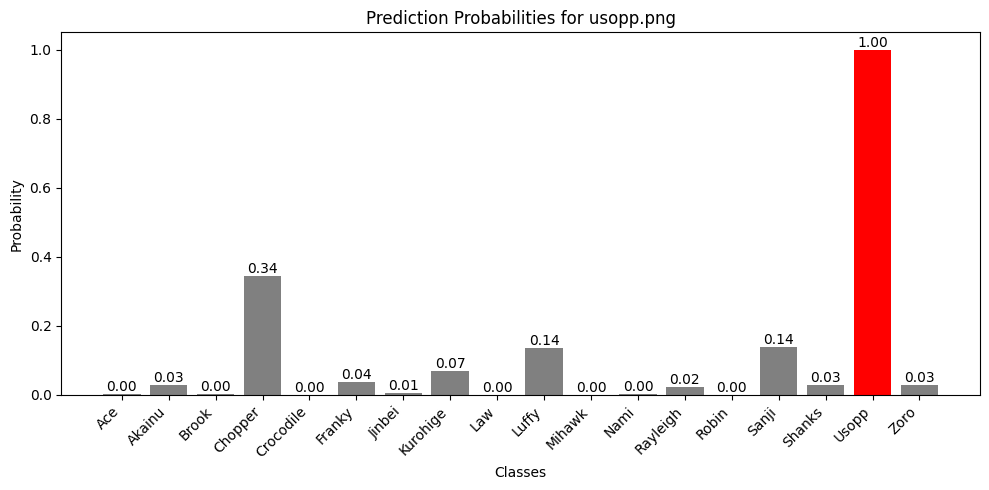

In [16]:
# Create a bar plot of the predictions
plt.figure(figsize=(10, 5))
plt.bar(class_names, predictions_array[0], color='gray')
plt.title(f"Prediction Probabilities for {img_path}")
plt.xlabel("Classes")
plt.ylabel("Probability")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Highlight the predicted class
plt.bar(predicted_class_name, predictions_array[0][predicted_class_index], color='red')

# Add value labels on top of each bar
for i, v in enumerate(predictions_array[0]):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

## Inference dengan folder gambar

In [17]:
# List to store all results
results = []

# Loop through all the images in the Images folder
for img_name in os.listdir("Images"):
    # Preprocess the image
    img_path = os.path.join("Images", img_name)
    img = preprocess_image(img_path)
    img_list = img.numpy().tolist()

    # Make a request to the Prediction API
    json_data = {"instances": img_list}
    response = requests.post(endpoint, json=json_data)

    if response.status_code == 200:
        # Get the predictions from the response
        predictions = json.loads(response.text)['predictions']

        # Convert predictions to numpy array
        predictions_array = np.array(predictions[0])

        # Get the predicted class
        predicted_class_index = np.argmax(predictions_array)
        predicted_class_name = class_names[predicted_class_index]
        
        # Store the results
        results.append((img_path, img_name, predicted_class_name))
        
        print(f"The predicted class for {img_name} is: {predicted_class_name}")
    else:
        print(f"Error: {response.status_code}")
        print(response.text)

The predicted class for shanks.png is: Shanks
The predicted class for crocodile.png is: Crocodile
The predicted class for rayleigh.png is: Rayleigh
The predicted class for ace.png is: Ace
The predicted class for sanji.jpg is: Sanji
The predicted class for usopp.png is: Usopp
The predicted class for brook.png is: Brook
The predicted class for akainu.png is: Akainu
The predicted class for nami.png is: Nami
The predicted class for mihawk.png is: Mihawk
The predicted class for law.png is: Law
The predicted class for chopper.png is: Chopper
The predicted class for jinbei.jpg is: Jinbei
The predicted class for robin.png is: Robin
The predicted class for kurohige.png is: Kurohige
The predicted class for franky.png is: Franky
The predicted class for zoro.jpg is: Zoro
The predicted class for luffy.jpg is: Luffy


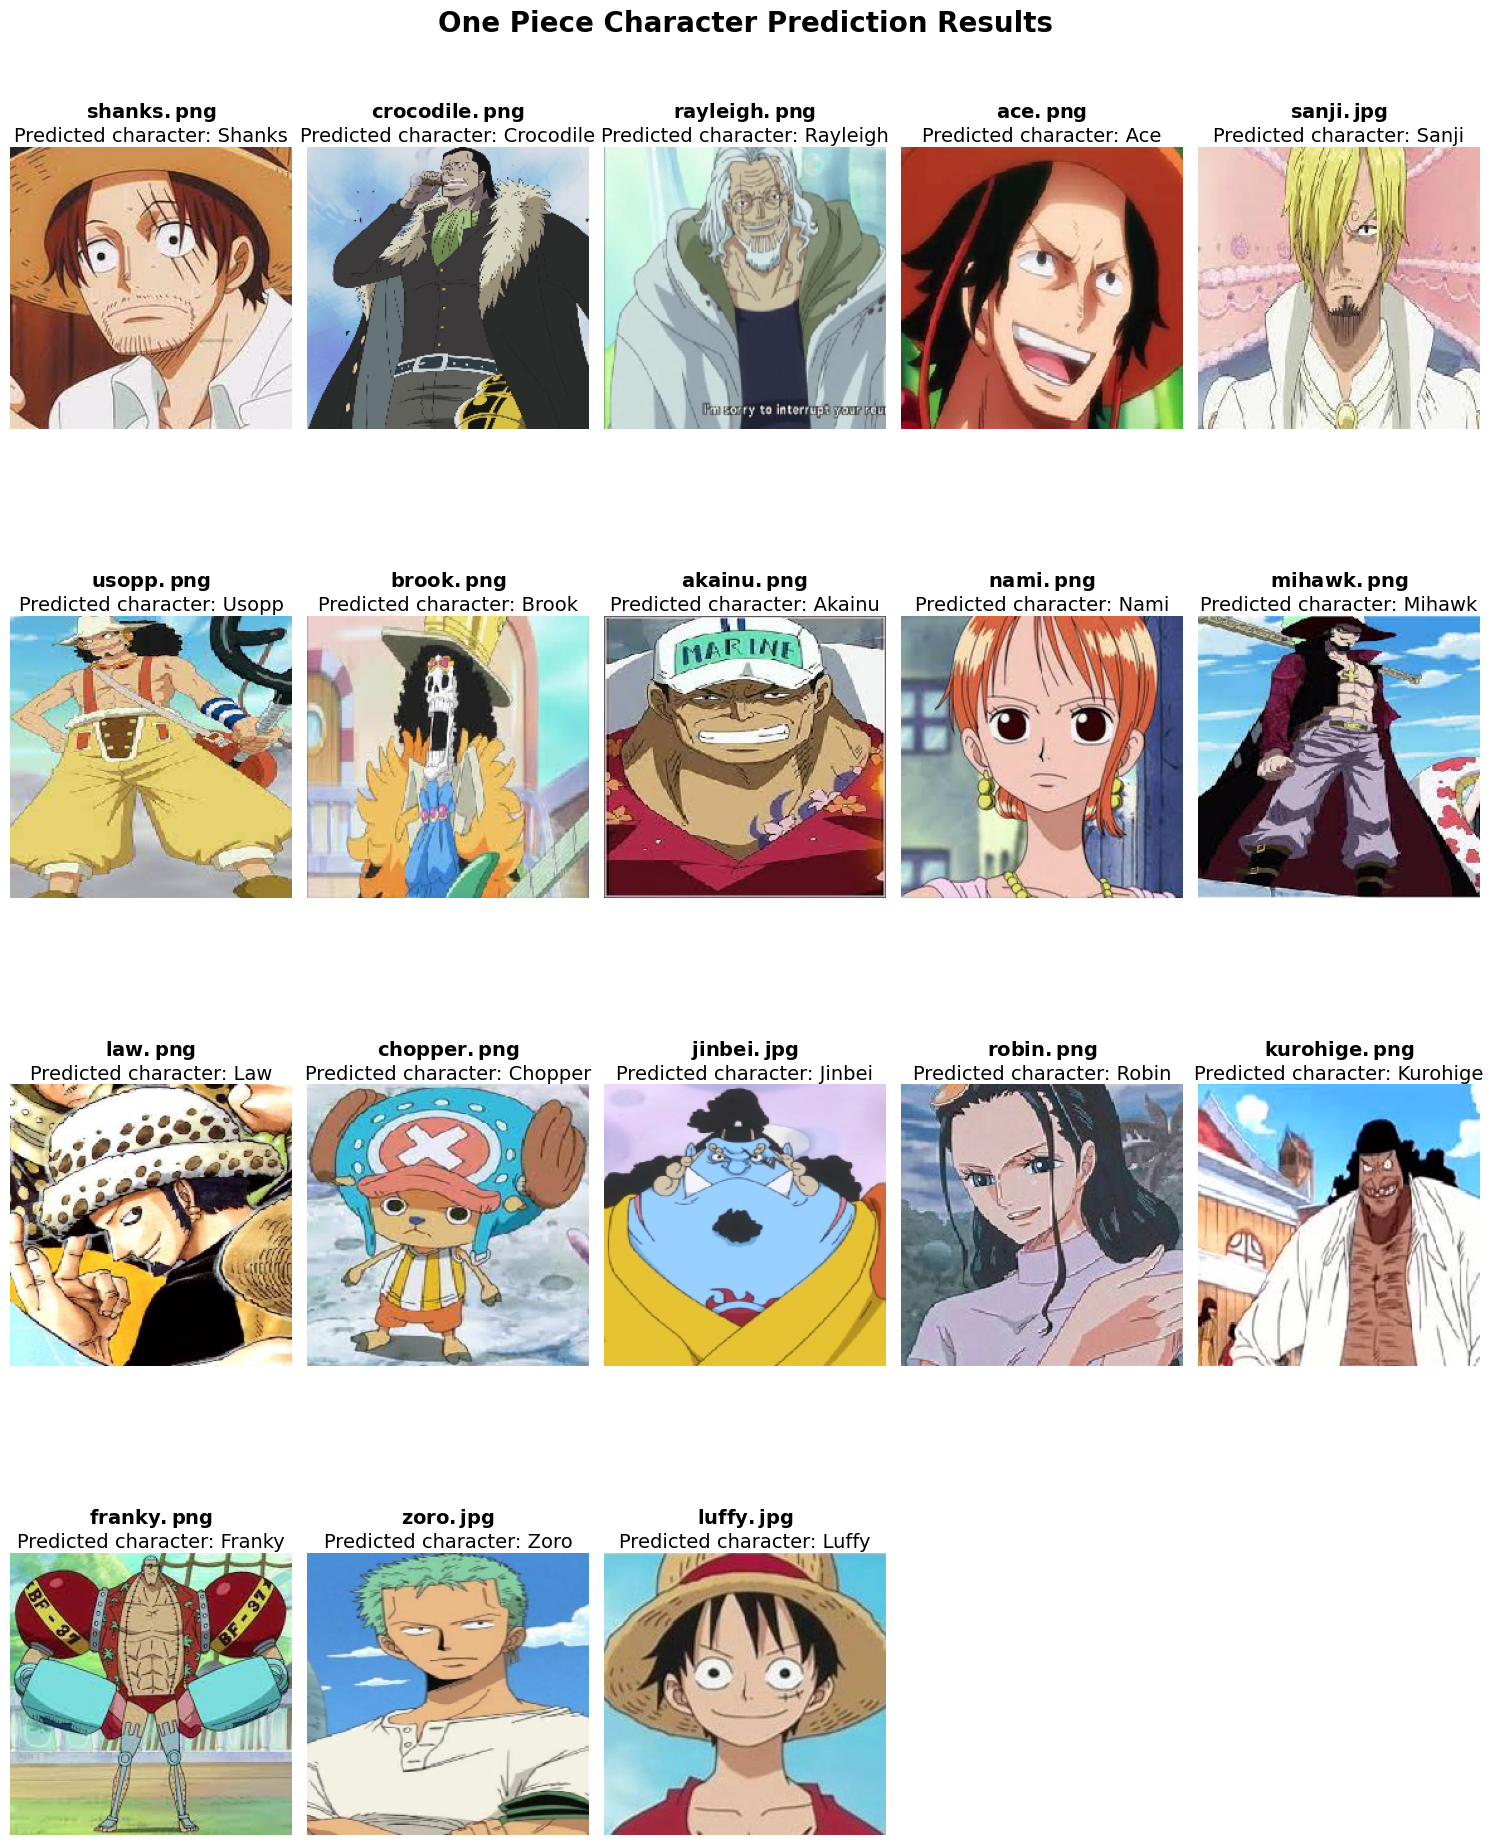

In [42]:
# Create the plot
n = len(results)
cols = 5
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
fig.suptitle("One Piece Character Prediction Results", fontsize=20, weight='bold')

for i, (img_path, img_name, predicted_class) in enumerate(results):
    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]
    
    # Display the image
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    ax.imshow(img)
    ax.axis('off')
    
    # Add filename and predicted class below the image
    ax.set_title(f"$\\bf{{{img_name}}}$\nPredicted character: {predicted_class}", fontsize=14, wrap=True)

# Remove empty subplots
for i in range(n, rows * cols):
    fig.delaxes(axes[i // cols, i % cols] if rows > 1 else axes[i % cols])

plt.tight_layout()
plt.show()